# Matplotlib.pyplot c.d. - specjalistyczne metody wizualizacji danych I

Standardowo zamiast pełnej nazwy biblioteki `matplotlib.pyplot` będziemy używać skrótu `plt`.

## Wykresy kreskowe

Wykresy kreskowe są prostym sposobem wizualizacji rozpiętości danej cechy. Najczęściej stosuje się je w połączeniu z innym typem wykresu jako informację uzupełniającą wizualizację.

Funkcje tworzące wykresy kreskowe to

`plt.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', hold=None, data=None, *inne opcje obiektu Line Collection)` - linie pionowe (równoległe do OY) oraz

`plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', hold=None, data=None, *inne opcje obiektu Line Collection)` - linie poziome (równoległe do OY), gdzie:

 - `x` (`y`) - lista, macierz lub $n$-krotka: współrzędne linii pionowych (poziomej) na osi OX (OY).
 - `ymin` (`xmin`) - lista, macierz lub $n$-krotka współrzędnych kresu dolnego linii względem osi OY (OX).
 - `ymax` (`xmax`) - lista, macierz lub $n$-krotka współrzędnych kresu górnego linii względem osi OY (OX).
 - `colors` - string (lub ich lista, macierz, krotka) definiujący kolor linii (lub poszczególnych linii).
 - `linestyles` - styl linii (lub poszczególnych linii). Do wyboru:
     - `'solid'` - linia ciągła,
     - `'dashed'` - linia kreskowana,
     - `'dashdot'` - linia ,,kropka kreska'',
     - `'dotted'` - linia wykropkowana
 - `label` - string, nazwa wykresu

Przykład: do krzywej średniego wyniku w grupach G1 - G10 dodane są linie obrazujące rozpiętość wyników od minimum do maksimum.

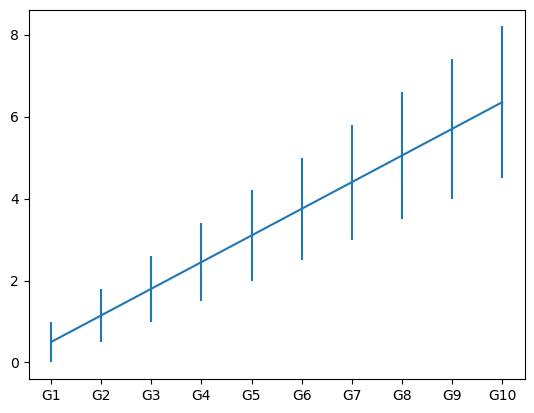

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Min=np.arange(0,5,0.5)
Max=Min+1+np.arange(0,3,0.3)
Mean=(Max+Min)/2

Ticks=[]
for i in range(0,10):
    Ticks.append('G'+str(i+1))

plt.xticks(Min,Ticks)
plt.vlines(Min,Min,Max)
plt.plot(Min,Mean)


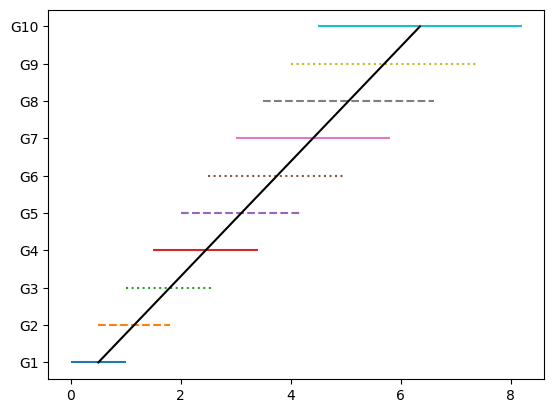

In [2]:
import matplotlib.colors as mc
Color=[x for i,x in enumerate(mc.TABLEAU_COLORS) if i<10]
Linestyles=['solid' if n%3==0 else 'dashed' if n%3==1 else 'dotted' for n in range(10)]

plt.yticks(Mean,Ticks)
plt.hlines(Mean,Min,Max,color=Color,linestyles=Linestyles)
plt.plot(Mean,Mean,color='k')


## Wykres łodygowy (stem chart)

Wykres łodygowy jest atrakcyjniejszą wizualnie wariacją klasycznego wykresu słupkowego. Używany jest głównie w sytuacjach, gdy chcemy zwrócić uwagę odbiorcy na przebieg górnych punktów słupków.

Wykres słupkowy tworzy funkcja `plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-',use_line_collection=False)`, gdzie:

 - `x` - lista, tablica, $n$-krotka: położenie słupka na osi OX,
 - `y` - lista tablica, $n$-krotka: wysokość słupka,
 - `linefmt` - format słupka. Opcje formatowania identyczne jak dla wykresu liniowego `plot`,
 - `markerfmt` - format markera podkreślającego koniec słupka. Opcje jak dla punktowych form wykresu liniowego `plot`,
 - `basefmt` - format linii bazowej łączącej podstawy słupków. Opcje jak dla wykresu liniowego `plot`,
 - `use_line_collection=True/False` - jeżeli `True`, linie wykresu będą obiektem typu `LineCollection`, co powoduje szybsze renderowanie grafiki.

Przykład:

/tmp/ipykernel_24816/83302469.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(X,Y,linefmt='-.g',basefmt='-r',markerfmt='xb',use_line_collection=True)


<StemContainer object of 3 artists>

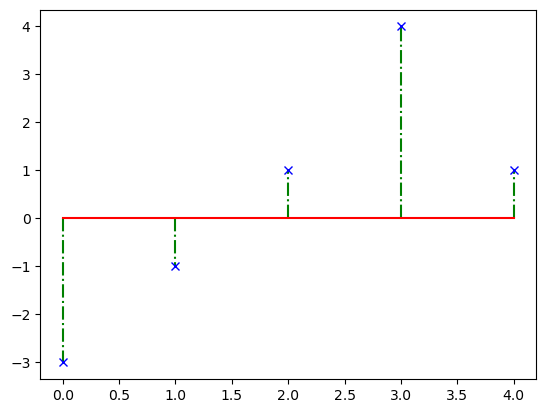

In [3]:
X=np.arange(0,5,1)
Y=[-3,-1,1,4,1]

plt.stem(X,Y,linefmt='-.g',basefmt='-r',markerfmt='xb',use_line_collection=True)

## Wykres pudełkowy (box and whiskers chart)

Wykres pudełkowy jest jednym ze specjalistycznych typów wykresów używanych w statystyce. Zasada tworzenia pojedynczego pudełka: podstawa pudełka to górna granica pierwszego kwartyla $Q1$, góra pudełka to górna granica trzeciego kwartyla $Q3$, kreska wewnątrz pudełka określa położenie mediany. Długości wąsów to półtorej wartości rozstępu ćwiartkowego, tzn. $1,5\cdot(Q3-Q1)$. Pojedyncze punkty reprezentują wartości leżące poza zakresem objętym przez wąsy, tzn. poza $[Q1-1,5\cdot(Q3-Q1),Q3+1,5\cdot(Q3-Q1)]$.

![Tworzenie wykresu pudełkowego](box_creation.png)

Funkcja do automatycznego tworzenia wykresu pudełkowego to `plt.boxplot(x)`. Tworzy ona wykresy pudełkowe osobno dla każdej kolumny macierzy `x` lub, jeżeli `x` jest w postaci listy wektorów (`list`), osobno dla każdego wektora. Składnia domyślna tej funkcji to:

`plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, bootstrap=None, usermedians=None, conf_intervals=None, positions=None, widths=None, patch_artist=None, labels=None, manage_xticks=True, autorange=False, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None)`

 - `x` - macierz lub lista wektorów; dane wejściowe,
 - `notch=True/False` - jeżeli `True`, zamiast klasycznego wykresu pudełkowego otrzymamy wykres klepsydrowy z wcięciem na medianie. Wcięcie jest obliczane z użyciem asymptotycznej aproksymacji Gaussa (tzn. zakładającej rozkład normalny próbek) i reprezentuje przedział ufności.
 - `sym` - string, formatowanie pojedynczych punktów,
 - `vert=True/False` - jeżeli `False`, to otrzymamy poziomy wykres,
 - `whis` - float, lista floatów lub `'range'`: współczynnik, przez który mnożony jest rozstęp ćwiartkowy przy obliczaniu długości wąsów albo wprost lista percentyli w formacie `[.,.]` precyzyjnie określająca położenie wąsów. W przypadku `'range'` wąsy będą szkicowane od wartości minimalnej do maksymalnej zbioru danych.
 - `bootstrap` - integer. W przypadku, gdy domyślnie obliczony przedział ufności mija się z rzeczywistością (np. w przypadku gdy rozkład próbek jest daleki od normalnego) domyślny przedział ufności naokoło mediany zostanie ponownie spróbkowany i na tej podstawie zostanie wyznaczony nowy przedział, który zostanie ponownie spróbkowany i tak ` bootstrap` razy. Zalecane wartości od 1000 do 10000.
 - `usermedians` - tablica, lista, $n$-krota o pierwszym wymiarze równym `len(x)`. Mediany zadane przez użytkownika.
 - `conf_intervals` - tablica, lista, $n$-krota o pierwszym wymiarze równym `len(x)` i drugim równym 2. Przedziały ufności zadane przez użytkownika. Pierwsza liczba oznacza bezwzględny początek przedziału ufności, druga jego koniec.
 - `positions` - tablica, lista, $n$-krota o wymiarze równym `len(x)`. Określa rozmieszczenie pudełek względem osi OX.
 - `widths`  - tablica, lista, $n$-krota o wymiarze równym `len(x)`. Określa szerokość poszczególnych pudełek.
 - `patch_artist=True/False` - służy do wyboru metody użytej do tworzenia pudełek. Jeżeli `False`, to zamiast metody *Patch* zostanie użyta metoda *Line2D*.
 - `labels` - labele dla każdego zbioru danych z osobna (podpisy znaczników na osi OX).
 - `manage_xticks=True/False` - włączanie automatycznego dostosowania znaczników na osi OX.
 - `autorange=True/False` - jeżeli `True` oraz dane mają taki rozkład, że liczebność Q1 i Q4 jest taka sama, wartość `whis` zostanie automatycznie ustawiona na `'range'` (wąsy od min do max).
 - `showmeans=True/False` - włącza/wyłącza zaznaczenie średniej arytmetycznej na wykresie.
 - `meanline=True/False` - jeżeli `True`, średnie zostaną zaznaczone nie jako punkt, tylko jako linia (jak mediana).
 - `showcaps=True/False` - włącza/wyłącza zakończenia na wąsach.
 - `showbox=True/False` - włącza/wyłącza widoczność osi.
 - `showfliers=True/False` - włącza/wyłącza widoczność pojedynczych punktów z poza zakresu.

Prosty przykład wykresów pudełkowych dla dwóch rozkładów normalnych (po lewej histogram):

{'whiskers': [<matplotlib.lines.Line2D at 0x7feebe2c6e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7feebe2c72e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feebe2c6b90>,
 'medians': [<matplotlib.lines.Line2D at 0x7feebe2c7820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feebe2c7ac0>,
 'means': []}

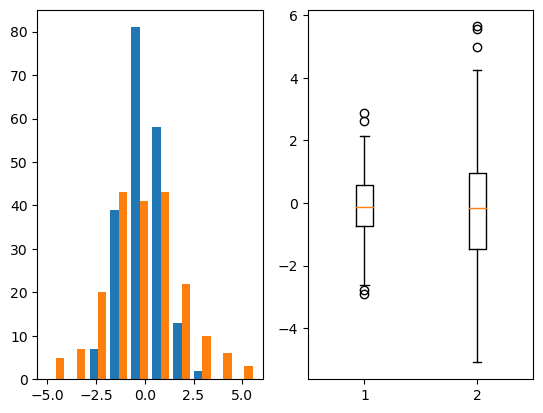

In [4]:
A=np.random.randn(200)
B=2*np.random.randn(200)

plt.subplot(121)
plt.hist([A,B])
plt.subplot(122)
plt.boxplot([A,B])

Bardziej złożony przykład:

{'whiskers': [<matplotlib.lines.Line2D at 0x7feebe193160>,
 'caps': [<matplotlib.lines.Line2D at 0x7feebe1936a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feebe192ec0>,
 'medians': [<matplotlib.lines.Line2D at 0x7feebe193ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feebe1c8040>,
 'means': [<matplotlib.lines.Line2D at 0x7feebe193d60>,
  <matplotlib.lines.Line2D at 0x7feebe1c92a0>]}

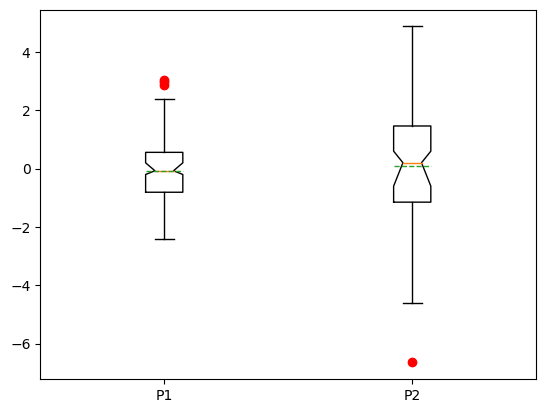

In [5]:
A=np.random.randn(200)
B=2*np.random.randn(200)

plt.boxplot([A,B], notch=True, sym='or',conf_intervals=[[-0.2,0.2],[-0.6,0.6]], positions=[1,2],
            labels=['P1','P2'],showmeans=True, meanline=True)

## Zadanie 1.

W pliku `punkty.csv` znajdują się wyniki czterech serii pomiarów dwóch zmiennych `x` oraz `y`. Naszkicować następujący wykres:
 - czerwonymi kropkami zaznaczyć na płaszczyźnie średnie położenia punktów w każdej z czterech serii,
 - dla każdej średniej naszkicować linie rozpiętości położeń na OX i OY w danej serii pomiarów.

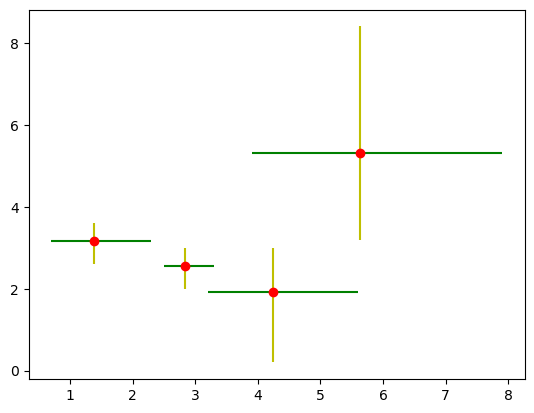

In [6]:
punkty=np.genfromtxt('punkty.csv',delimiter='\t') #x y x y x y x y
punkty_mean=punkty.mean(axis=0)
punkty_xmin, punkty_xmax = punkty[:,0::2].min(axis=0), punkty[:,0::2].max(axis=0)
punkty_ymin, punkty_ymax = punkty[:,1::2].min(axis=0), punkty[:,1::2].max(axis=0)
plt.vlines(punkty_mean[0::2],punkty_ymin, punkty_ymax, color='y')
plt.hlines(punkty_mean[1::2],punkty_xmin, punkty_xmax,color='g')
plt.plot(punkty_mean[0::2],punkty_mean[1::2],'ro')


## Zadanie 2.

Naszkicować histogramy danych z pliku `kobiety_wiek.txt` oraz `mezczyzni_wiek.txt` z poprzednich zajęć w formie wykresu łodygowego.

In [7]:
f = open("kobiety_wiek.txt", "rb")
kobiety_wiek=np.frombuffer(f.read())

f = open("mezczyzni_wiek.txt", "rb")
mezcyzni_wiek=np.frombuffer(f.read())


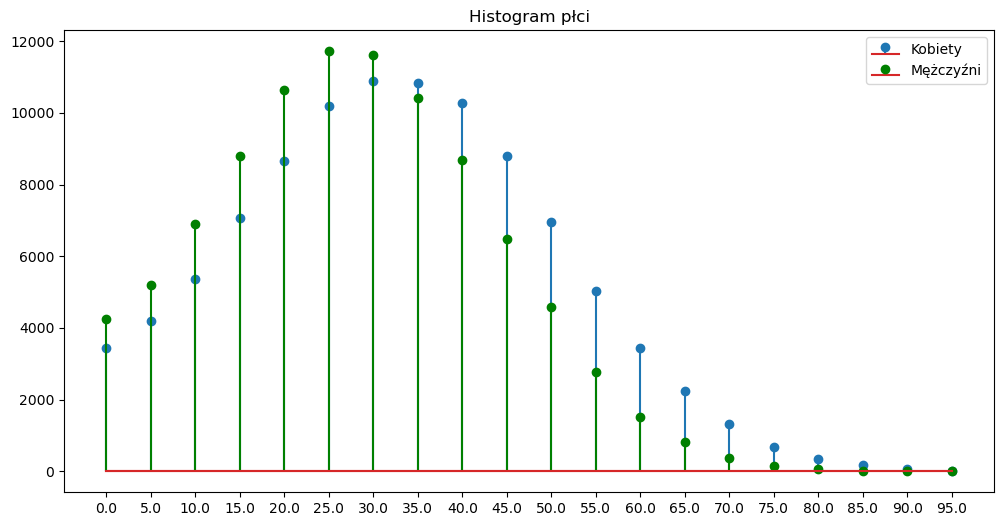

In [8]:
plt.figure(figsize=(12,6))

counts, bins = np.histogram(kobiety_wiek, bins=20,range=(0,100))
plt.xticks(range(len(bins)),bins)
plt.stem(counts)

counts, bins = np.histogram(mezcyzni_wiek, bins=20,range=(0,100))
plt.xticks(range(len(bins)),bins)
plt.stem(counts,'g')
plt.title("Histogram płci")
plt.legend(['Kobiety','Mężczyźni'])


## Zadanie 3.

Stworzyć wykresy pudełkowe dla danych z plików `kobiety_wiek.txt` oraz `mezczyzni_wiek.txt`. Następnie sztucznie wprowadzić medianę i przedziały ufności (wedle uznania).

{'whiskers': [<matplotlib.lines.Line2D at 0x7feebdf9ab00>,
 'caps': [<matplotlib.lines.Line2D at 0x7feebdf9b040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feebdf9a830>,
 'medians': [<matplotlib.lines.Line2D at 0x7feebdf9b580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feebdf9b820>,
 'means': []}

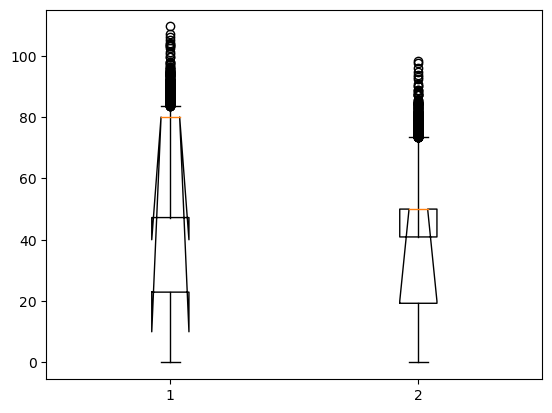

In [9]:
plt.boxplot([kobiety_wiek,mezcyzni_wiek],usermedians=[80,50],conf_intervals=[[10.,40.],[20.,50.]],notch=True)


## Zadanie 4.

Wybrane dane odnośnie wieku dla konkretnej płci podzielić na osobne zbiory danych dla wieku $[0,10)$, $[10,20)$, $[20,30)$, $[30,40)$, $[40,50)$, $[50,60)$, $[60,70)$, $[70,80)$, $[80,\infty)$. Utworzyć wykresy pudełkowe dla danych z poszczególnych zbiorów. Zaznaczyć mediany i średnie w postaci linii, spróbować metody `bootstrap` dla przedziałów ufności, wąsy ustawić od wieku minimalnego do maksymalnego w danym przedziale. Podpisać znaczniki na osiach.

In [10]:
przedzial=[[x for x in kobiety_wiek if x< (i+1)*10 and x>=i*10] for i in range(8)]
przedzial.append([x for x in kobiety_wiek if x >80])

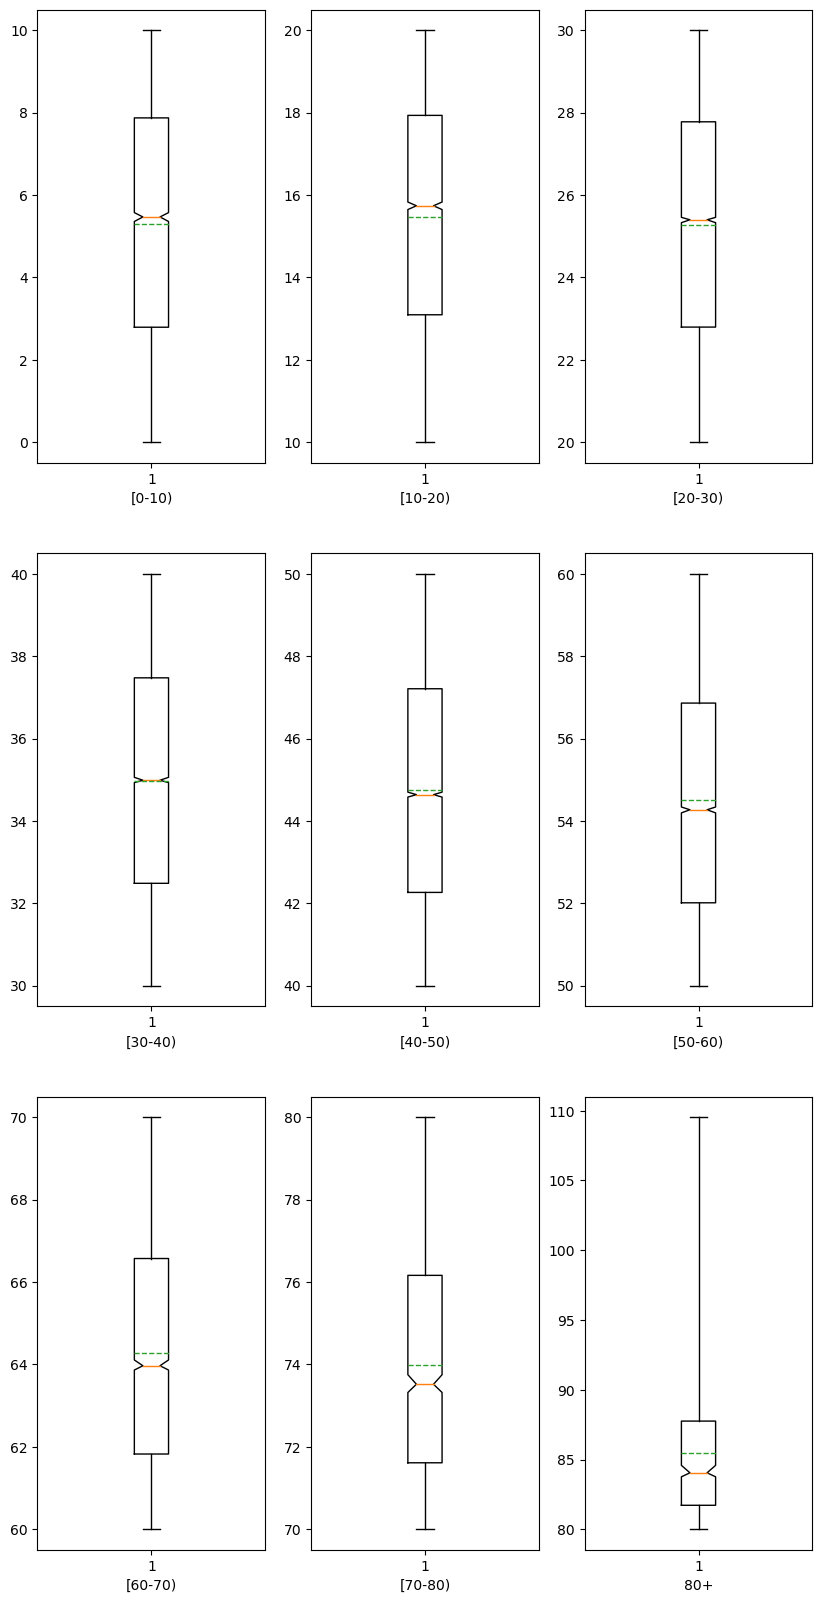

In [24]:
grupa=['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','80+']
fig = plt.figure(figsize=(10, 20)) 
for plot,group in enumerate(grupa): 
    ax = fig.add_subplot(3, 3, plot+1)
    plt.boxplot(przedzial[plot],notch=True,whis=(0,100),bootstrap=4000,showmeans=True,meanline=True)
    plt.xlabel(f'{group}')